# Week 2 
## Exercises 
### Chapter 1

#### List three different real networks and state the nodes and links for each of them.
 * Social networks, professional networks etc. 
   * People as nodes their aquaintances as links
 * Power grids
   * Power sources as nodes, their transmission lines as links
 * The internet
   * Pages as nodes, Uniform Resource Locator (URL's) as links
 * Network of airlines
   * Airport as nodes, routes between the destinations as links


#### Tell us of the network you are personally most interested in. Address the following questions:
**The internet**

How different pages are linked, referenced and which of these that are the most used. Being able to work with figuring out/analyse why some pages are more "attractive" than others, what is the content of these pages, how often are they visited what are the pages used for -- are there any common denominators? 

**Professional networks**

Furthermore I really liked the part in the chapter describing how professional networks in a workplace since it gives really valueable insight into the relations between the co-workers and how they interact. It gives a possibility to learn from the most influential co-workers in order to communicate better on an overall basis.

**Bonus**

I think networks are really exciting!
Also neural networks and machine learning, teaching the computer how to interpret a network.

** Oh! and I forgot **

I am really into transportation networks i.e. "Rejseplanen" this is more from an algorithmic point of view but also since one have to work with a directed graph with weights which makes it a tad more complex. 

#### What are its nodes and links?
*I will only discuss this for the internet.*

As described in prevous question.
#### How large is it?
Really big -- as of September 2014, there were 1 billion websites on the Internet, [LiveScience](http://www.livescience.com/54094-how-big-is-the-internet.html) 
#### Can be mapped out?
Yes, [the internet map](http://internet-map.net/) describes and illustrates it pretty thorough. It's interactive too, it's awesome!
#### Why do you care about it?
I was fasscinated by the OPTE project on my 2nd semester were we briefly touched the subject in an introductory algorithms course. I care about it because the internet is a vital part of everyone's lives. It connects people across borders and helps in making everything easier: access to information (sharing knowledge), communication, collaboration. Of course what you are using the internet for varies but I really like how it wipe out some of the otherwise largest borders between people. Since everyone can contribute to it it makes the possibilites nearly unlimited and this way everyone can be a part of something a lot bigger. This of course is also one of the reasons why the internet is so big. And that is what I want to look into in mroe detail!

#### In your view what would be the area where network science could have the biggest impact in the next decade? 
*Explain your answer - and base it on the text in the book.*

In relation to neural science and neural networks. It would be a really big step for all things touched by biology and medicine to be able to map everything that goes on in the brain.
_____________________________________________________________________________________________________________


### Chapter 2

#### Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why?
Since a sparse network is a network with less number of links than the maximum possible number of links within the same network [[wiki]](https://en.wikipedia.org/wiki/Sparse_network) yes, most networks are sparse. The fact that some nodes in a network has a lot of links does not make the entire network complete. A complete network means that all nodes has connections to each other (as described in the book sec 2.5). Since the world is so big it would be impossible for everyone to know one another. 

Of course this still gives room to having a lot of links to each node. An example could be Facebook. Now, "many connections" is relative, and there is a difference in having, say 50 friends, and 4.000 friends, but this is still more than none.
____________________________________________________________________________________________________________________

## .:: NetworkX ::.

#### Go to the NetworkX project's [tutorial](http://networkx.readthedocs.org/en/stable/tutorial/) page. 
*The goal of this exercise is to create your own notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense. 
There is an error in the tutorial about accessing edges. Can you find it, and solve the problem?*

### Creating a graph

In [2]:
import networkx as nx
G=nx.Graph()          # initialize a graph

#### Nodes

In [14]:
G.add_node(1)       # adds a single node
G.add_nodes_from(["hi","these","are","nodes"])
H=nx.path_graph(10) # New graph H with nodes 0-9
G.add_nodes_from(H) # nodes from H added to G
G.add_node(H)      # now making G a graph with nested graph H

### Edges

In [15]:
G.add_edge(1,2)
e=(2,3)         # edge tuple
G.add_edge(*e)  # edge tuple -- unpack and add
G.add_edges_from(H.edges())

# DEMOLISHING GRAPH
# G.remove_nodes_from()
# G.remove_edge()
# G.remove_edges_from() # etc..
G.remove_node(H)

# REMOVING EVERYTHING FROM GRAPH
G.clear()

# Adding nodes -- no problems when nodes already in graph
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds one node "spam"
G.add_nodes_from("spam") # adds a node for each char in string spam (s,p,a,m)

In [19]:
# Get graph information:
## Number of nodes
G.number_of_nodes()

## Number of edges
G.number_of_edges()

2

In [20]:
# Getting all nodes
G.nodes()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [21]:
# Getting all edges 
G.edges()

[(1, 2), (1, 3)]

In [23]:
# Looking at neighbors 
# -- remember to state the node you want to look at as parameter!
G.neighbors(1)

[2, 3]

In [24]:
# Removing nodes and edges:
G.remove_node("spam")  # using remove_nodes_from("spam") removes the characters
G.nodes()
# G.remove_edge(1,3)

['a', 1, 2, 3, 'm', 'p', 's']

### What to use as nodes an edges

In [ ]:
# Remember that all nodes can be converted into integer values for 
# a more meaningful graph
# convert_node_labels_to_integers()

#### Accessing edges

In [27]:
# Iterate between nodes !!!! awesome!!
# Remember not to change the resulting dict 
# -- it might leave the graph in an inconsistent state!
G[3]
G[3][1]

{}

In [32]:
# Setting the attributes of an edge - totally fine
G.add_edge(1,3)
G[1][3]['color']='blue'
G[1][3]

{'color': 'blue'}

In [33]:
# Adjacency iterators -- accessing edge information (weighted)
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for n, nbrs in FG.adjacency_iter():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5 : print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [36]:
# Edges method - accesses all edges
for (u, v, d) in FG.edges(data='weight'):
    if d < 0.5: print('(%d, %d, %.3f)'%(n, nbr, d))

(4, 3, 0.125)
(4, 3, 0.375)


### Adding attributes to graphs, nodes, and edges

#### Graph attributes

In [38]:
# Assigning graph attributes when creating new graph
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [39]:
# This can also be modified later
G.graph['day']='Monday'
G.graph

{'day': 'Monday'}

#### Node attributes

In [43]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.node[3]

{'time': '2pm'}

In [44]:
G.node[1]['room'] = 714
# Showing nodes and respective data
G.nodes(data = True)

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

#### Edge attributes

In [51]:
G.add_edge(1,2, weight=4.7)  # giving the edge a weight of 4.7
G.add_edges_from([(3,4),(4,5)],color='red') # two edges made red
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})]) # adding color and weight to two different edges
G[1][2]['weight'] = 4.7      # same ting as the first assignment 
G.edge[1][2]['weight'] = 4   # making the weight 4 instead of 4.7
G.edges(data = True)         # showing the resulting edges

[(1, 2, {'color': 'blue', 'weight': 4}),
 (2, 3, {'weight': 8}),
 (3, 4, {'color': 'red'}),
 (4, 5, {'color': 'red'})]

#### Directed graphs

In [52]:
# DiGraph class
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,3,0.5),(3,1,0.75)]) # weighted edges 1,3 and 3,1
DG.out_degree(1,weight='weight') # showing the weight of edge 1

0.5

In [53]:
DG.degree(1,weight='weight') # sum of both weights (1,3) and (3,1) both ways

1.25

In [54]:
DG.successors(1)

[3]

In [56]:
DG.neighbors(3) # number of neighbors to edge

[1]

In [59]:
# Converting graph from directed to undirected
G.to_undirected()

# otherwise
H = nx.Graph(G) # convert to undirected

#### Multigraphs

Provides clases for graphs with multiple edges between any pair of nodes. *MulitGraph* or *MultiDiGraph*.

In [63]:
# Creating a graph with multiple edges between any pair of nodes.
MG=nx.MultiGraph()
MG.add_weighted_edges_from([(1,2,.5), (1,2,.75), (2,3,.5)])
print 'weights for the different edges:'
MG.degree(weight='weight')

weights for the different edges:


{1: 1.25, 2: 1.75, 3: 0.5}

In [65]:
GG=nx.Graph()
for n,nbrs in MG.adjacency_iter():
    for nbr,edict in nbrs.items():
        minvalue=min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)
print 'Shortest path:'
nx.shortest_path(GG,1,3)

Shortest path:


[1, 2, 3]

#### Graph generators and graph operations
*Generating graphs instead of creating them manually*

**Link to section on how to read and write graphs [here](http://networkx.readthedocs.io/en/stable/reference/readwrite.html)**

**Link to graph generator information [here](http://networkx.readthedocs.io/en/stable/reference/generators.html)**


Some smart operations to remember:
* subgraph(G, nbunch)      - induce subgraph of G on nodes in nbunch
* union(G1,G2)             - graph union
* disjoint_union(G1,G2)    - graph union assuming all nodes are different
* cartesian_product(G1,G2) - return Cartesian product graph
* compose(G1,G2)           - combine graphs identifying nodes common to both
* complement(G)            - graph complement
* create_empty_copy(G)     - return an empty copy of the same graph class
* convert_to_undirected(G) - return an undirected representation of G
* convert_to_directed(G)   - return a directed representation of G

In [68]:
# Some classic small graphs
petersen=nx.petersen_graph()
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tet=nx.tetrahedral_graph()

In [69]:
#Constructive generator for classic graphs
K_5=nx.complete_graph(5)
K_3_5=nx.complete_bipartite_graph(3,5)
barbell=nx.barbell_graph(10,10)
lollipop=nx.lollipop_graph(10,20)

In [74]:
# Stochastic graph generator
er=nx.erdos_renyi_graph(100,0.15)
ws=nx.watts_strogatz_graph(30,3,0.1)
ba=nx.barabasi_albert_graph(100,5)
red=nx.random_lobster(100,0.9,0.9)

In [76]:
# Reading graphs in graph formats <3
# i.e: edge lists, adjacency lists, GML, GraphML, pickle, LEDA etc.
nx.write_gml(red,"gml_graph")
mygraph=nx.read_gml("gml_graph")

#### Analyzing graphs

In [88]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3)])
G.add_node("spam")

In [91]:
# Show which components that are connected
nx.connected_components(G)
# shows the location in memory, not really what I expected? d:

<generator object connected_components at 0x0000000006B8A750>

In [83]:
sorted(nx.degree(G).values())

[0, 1, 1, 2]

In [84]:
# computes clustering coefficient
nx.clustering(G)

{1: 0.0, 2: 0.0, 3: 0.0, 'Spam': 0.0}

In [85]:
# edges connected to node
nx.degree(G)

{1: 2, 2: 1, 3: 1, 'Spam': 0}

#### Drawing graphs

NetworkX is not made for grphs, but it can be done with matplotlib and Graphviz

In [92]:
import matplotlib.pyplot as plt

In [95]:
nx.draw(G)
plt.show()

In [96]:
nx.draw_random(G)
plt.show()

In [ ]:
nx.draw(lollipop)
plt.show()

In [107]:
nx.draw_spring(ba,node_size=40,node_color='#7FA8FF')
plt.show()

In [105]:
# Saving files with the drawings
nx.draw_spring(ba,node_size=40,node_color='#7FA8FF')
plt.savefig('ba_plot')

In [103]:
# testing whether the last solution works
#from networkx.drawing.nx_pydot import write_dot
#nx.draw_graphviz(ba)
# not available on system

## Part 3: Plotting degree distributions
*Some of the right packages has already been imported in the above examples.*

For ispection later, the [igraph tutorial](http://igraph.org/python/doc/tutorial/tutorial.html)

In [149]:
import matplotlib
import numpy as np
import random as rnd

#### Random numbers

In [154]:
# Binning real numbers, 5000 data points from aussian distribution
gauss = np.random.normal(size=5000)

#### Binning numbers into 10 bins using histogram

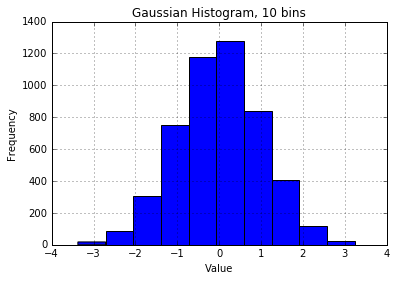

In [156]:
# The Gaussian distribution
plt.hist(gauss)

# For readability.
plt.grid(True)
plt.title("Gaussian Histogram, 10 bins")
plt.xlabel("Value")
plt.ylabel("Frequency")
# By default 10 bins is used.

#### Why count and bin have different lengths.
Remember to get this part explained.

### Binning integers
[Numpy Poisson Documentation](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html)

In [157]:
pois = np.random.poisson(size=5000)

In [161]:
# Maximum value
max(pois)

7

In [171]:
# Minimum value
min(pois)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [179]:
# The number of bins equals the unique values in pois:
np.unique(pois)
# This however is not the smartest way to do it, I import collections to do it differently:

# Specifying bins in a vector
import collections
counter=collections.Counter(pois)

Counter({0: 1882, 1: 1863, 2: 853, 3: 321, 4: 63, 5: 15, 6: 2, 7: 1})


#### Plotting the data as a bar chart

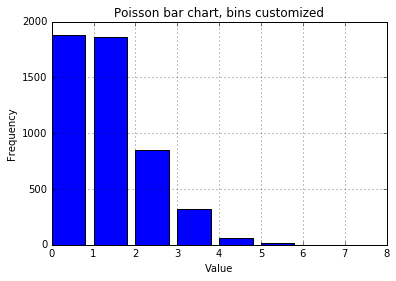

In [181]:
# bar chart using the collected values:
plt.bar(counter.keys(),counter.values())

# For readability
plt.grid(True)
plt.title("Poisson bar chart, bins customized")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [200]:
# Sum over bin count
5000/7
# Which shows the average number of values to each bin

714

#### Relation of bar chart to the Poisson distribution



Do not remember.

### Binning an plotting degree distributions
The Erdös-Renyi network

In [191]:
# p = 10/4999
er=nx.erdos_renyi_graph(5000,0.002)

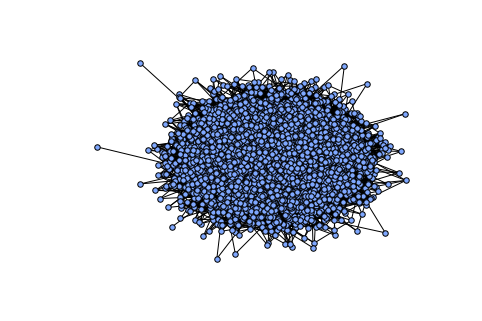

In [194]:
# Creating the graph
nx.draw_spring(er,node_size=30,node_color='#7FA8FF')
plt.show()

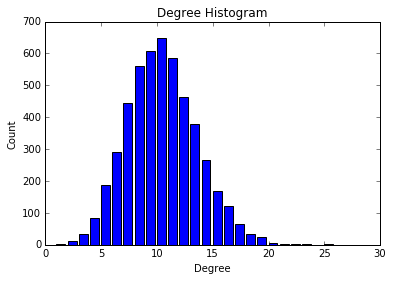

In [201]:
# Plotting the degree distribution
degree_sequence=sorted(nx.degree(er).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

# For readability
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

# Source: https://networkx.github.io/documentation/development/examples/drawing/degree_histogram.html

The degree in a random network is the binominal distribution -- as you said inthe lecture on Random Networks, which is now shown!

## Random Networks

### NS Exercise 3.1

**Erdős-Rényi Networks**
*Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability $p=10^-3 = 0,001$*

* What is the expected number of links, 〈L〉?

$p\cdot L(N) = 0.001\cdot 3000$


* In which regime is the network?

The critical point for a network:

*k < 1 - subcritical regime*

*k = 1 - critical point/supercritical regime*

*k > 1 - connected regime*

Therefore, to answer this question, we need to know the value of $k$.

The network does not consist of N isolated nodes, therefore the network is **not** in the *subcritical regime*. Since it is not possible for all nodes to be connected, the network is neither within the *connected regime*. This leaves the network to be within the *supercritical regime* which also matches a lot of todays social network. 


* Calculate the probability $pc$ so that the network is at the critical point



* Given the linking probability p = $10^-3$, calculate the number of nodes $Ncr$ so that the network has only one component.


* For the network in (d), calculate the average degree $〈kcr〉$ and the average distance between two randomly chosen nodes 〈d〉.


* Calculate the degree distribution $pk$ of this network (approximate with a Poisson degree distribution).



### Plot a random network
*With 200 nodes and degree 1.5*

Nice overview of different types of graph generators [here](https://networkx.github.io/documentation/development/reference/generators.html).

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

randG = nx.random_regular_graph(1,200)

#### Extract the Giant Connected Component

In [ ]:
giant = max(nx.connected_component_subgraphs(randG), key=len)

#### Choose a random node from the GCC

#### Find all 2-nodes (2 steps away)

#### Plot the GCC
*Following attributes*
 * Starting node: black
 * Nodes two steps away: red
 * All other nodes: blue
 
Associated reading material: [Network X Documentation](http://networkx.github.io/documentation.html)

## Homework

#### Section 2.12: Homework
*Write the solution exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.*


#### Solve exercise 2.3 
*'Graph representation' from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it).*


Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.